In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_excel(r'C:\Users\adity\Documents\Machine Learning\Miltivarite Regression\Heartattack_prediction_data.xlsx')
df1

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0,53,76.0,215.0,21.51,0,0.0,1,206.0,92.0,1.0,0,1,1
4308,0,49,65.0,98.0,20.68,0,0.0,0,96.0,63.0,0.0,0,0,0
4309,0,65,90.0,87.0,30.47,0,0.0,1,179.5,114.0,0.0,0,0,0
4310,1,46,75.0,74.0,23.59,1,20.0,0,119.0,77.5,0.0,0,0,0


In [3]:
df1.shape

(4312, 14)

In [4]:
df1.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [6]:
df1['Age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

In [7]:
df1.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [8]:
df = df1.dropna()

In [9]:
df.drop_duplicates(inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_9456\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(3949, 14)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,3949.0,0.436313,0.495990,0.00,0.00,0.00,1.00,1.0
Age,3949.0,49.549253,8.561709,32.00,42.00,49.00,56.00,70.0
Heart Rate,3949.0,75.794125,12.017503,44.00,68.00,75.00,83.00,143.0
Glucose,3949.0,82.040010,23.496781,40.00,72.00,78.00,87.00,394.0
BMI,3949.0,25.797371,4.067156,15.54,23.08,25.38,28.04,56.8
Smoker,3949.0,0.489997,0.499963,0.00,0.00,0.00,1.00,1.0
Ciggarates(Per Day),3949.0,9.031907,11.962920,0.00,0.00,0.00,20.00,70.0
Hypertension,3949.0,0.309952,0.462532,0.00,0.00,0.00,1.00,1.0
Systolic BP,3949.0,132.273614,21.939643,83.50,117.00,128.00,143.50,295.0
Diastolic BP,3949.0,82.869840,11.881098,48.00,75.00,82.00,89.50,142.5


In [13]:
col1 = df.iloc[:, 1:8]
col2 = df.iloc[:, 8:]

Age


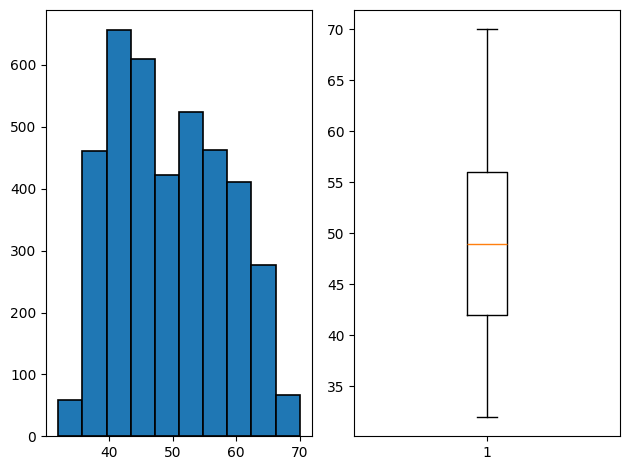

Heart Rate


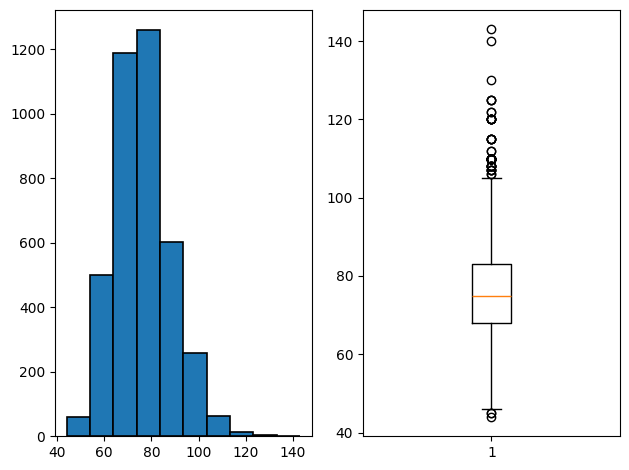

Glucose


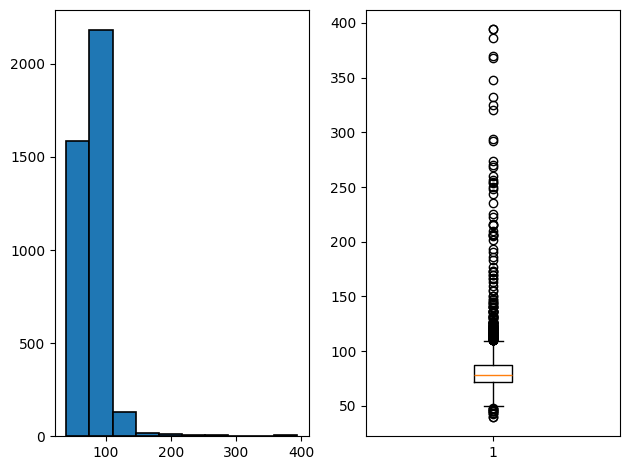

BMI


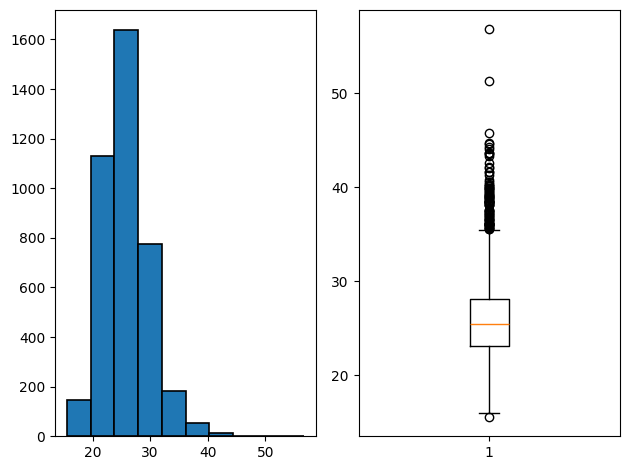

Smoker


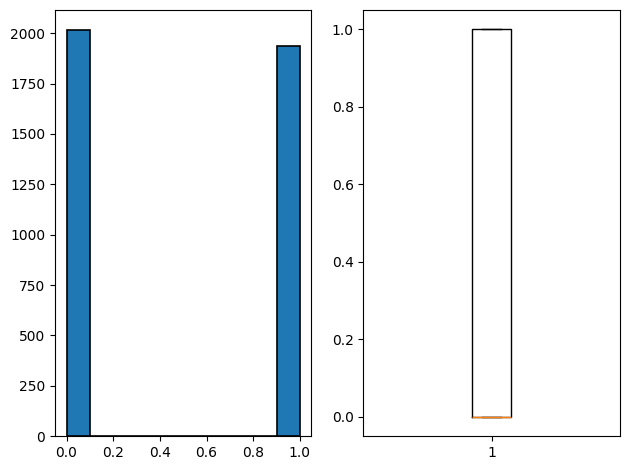

Ciggarates(Per Day)


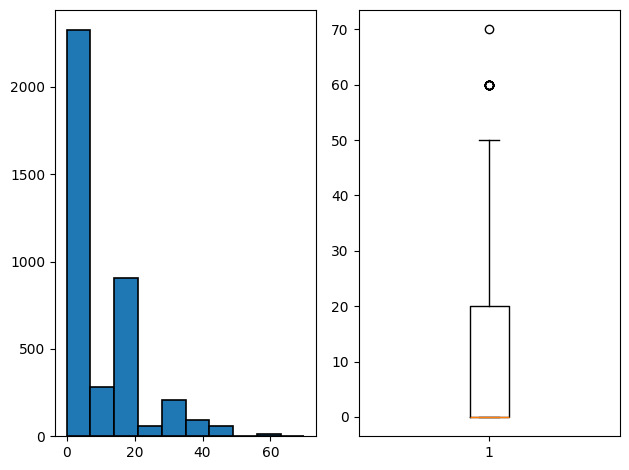

Hypertension


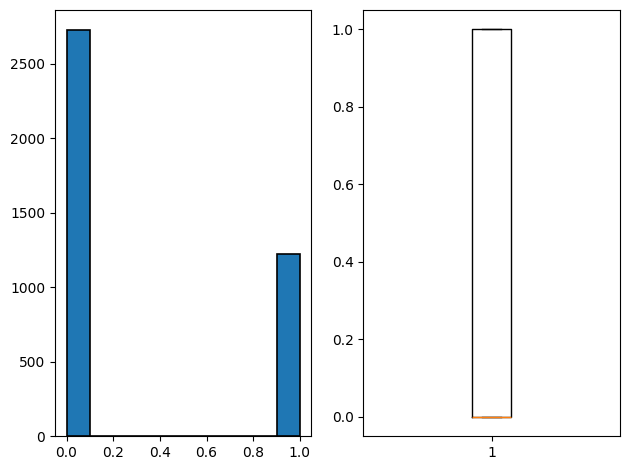

In [14]:
for i in col1:
    print(i)
    
    plt.figure()
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False, edgecolor='black',linewidth=1.2)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i])
    
    plt.tight_layout()
    plt.show()

Systolic  BP


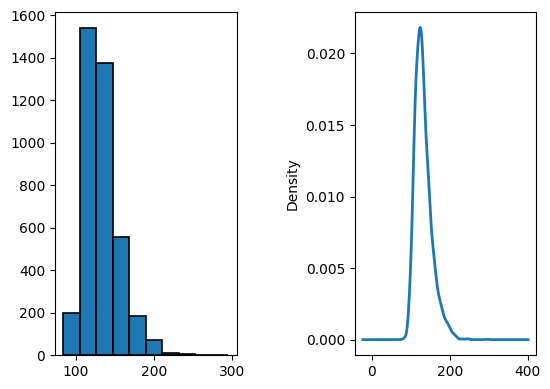

Diastolic BP


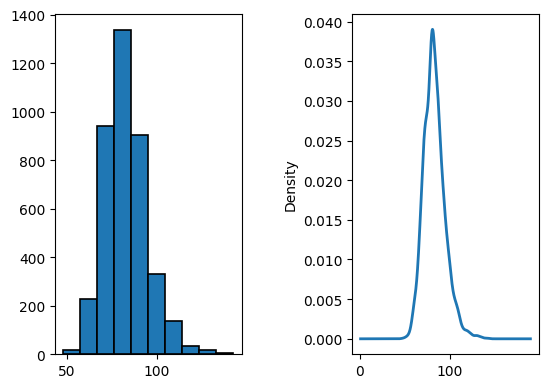

ON BP Medication


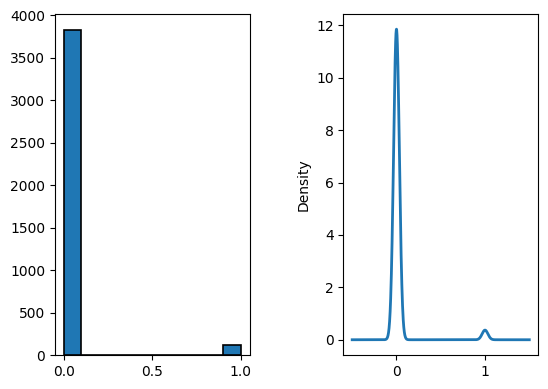

Previous Stroke


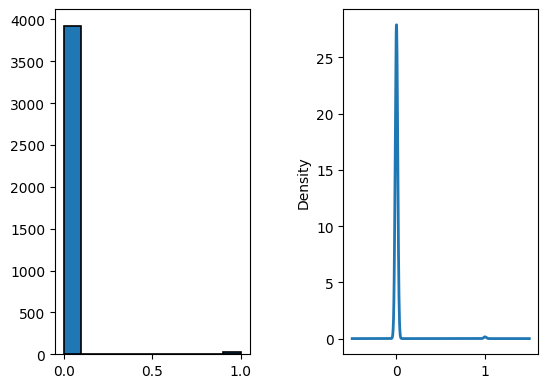

Diabetic


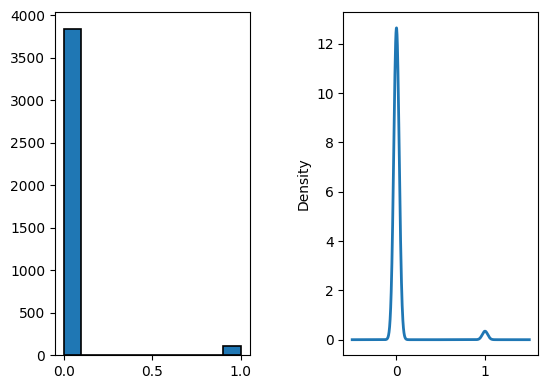

RiskOfCHD


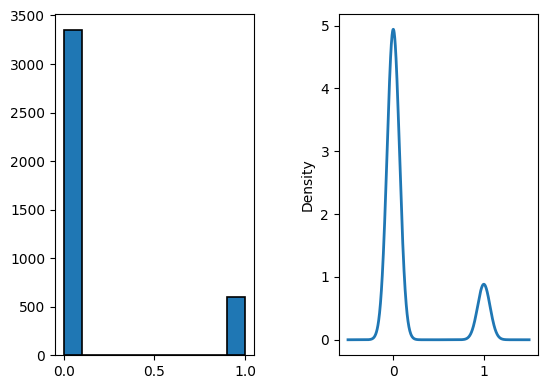

In [15]:
for i in col2:
    print(i)
    
    plt.figure()
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False, edgecolor='black',linewidth=1.2)
    
    plt.subplot(1, 2, 2)
    df[i].plot(kind='density',linewidth=2)
    
    plt.tight_layout(pad=4, w_pad=3, h_pad=3)
    plt.show()

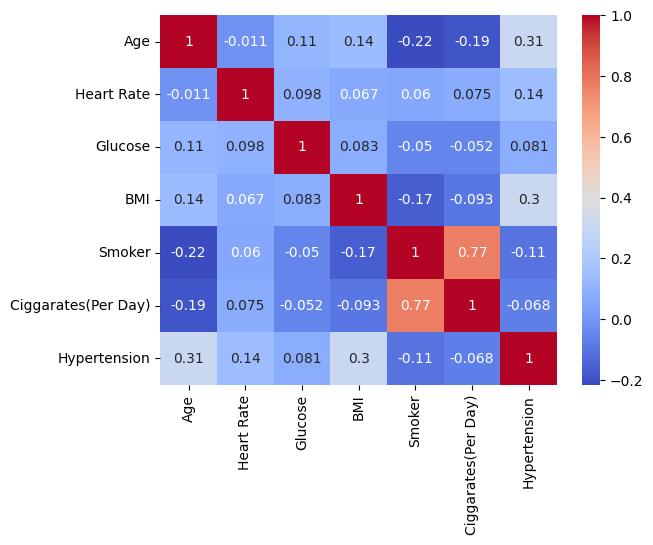

In [16]:
import seaborn as sns
corr = df.iloc[:, 1:8].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

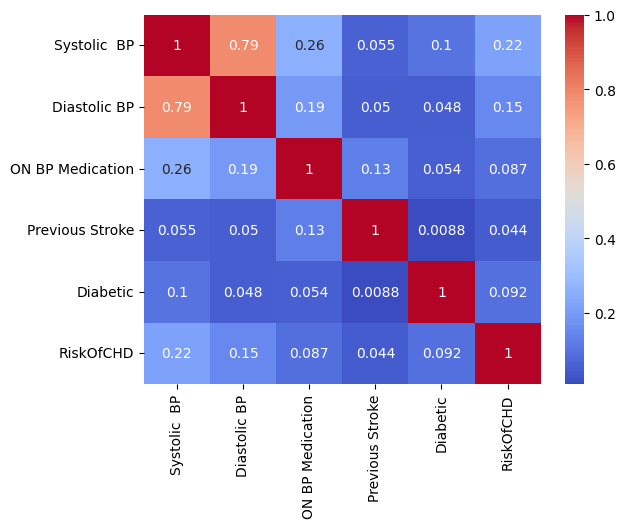

In [17]:
corr = df.iloc[:, 8:].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [18]:
df.groupby('Sex')['RiskOfCHD'].count()

Sex
0    2226
1    1723
Name: RiskOfCHD, dtype: int64

In [19]:
df.groupby('Sex')['Heart Rate'].mean().sort_values(ascending=False)

Sex
0    77.017969
1    74.213001
Name: Heart Rate, dtype: float64

In [21]:
df.groupby('Smoker')['RiskOfCHD'].count().sort_values(ascending=False)

Smoker
0    2014
1    1935
Name: RiskOfCHD, dtype: int64

In [23]:
df.groupby('Hypertension')['RiskOfCHD'].count().sort_values(ascending=False)

Hypertension
0    2725
1    1224
Name: RiskOfCHD, dtype: int64

In [24]:
df.groupby('Diabetic')['RiskOfCHD'].count().sort_values(ascending=False)

Diabetic
0    3844
1     105
Name: RiskOfCHD, dtype: int64

In [28]:
X = df[['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']]
y = df['RiskOfCHD']

In [29]:
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[ 1.13663216, -1.23229946, -0.98019109, -0.67020468, -1.19769228,
        -1.08335698],
       [-0.8797921 , -0.41460211, -0.98019109, -0.67020468, -0.5139118 ,
        -0.15739937],
       [ 1.13663216, -0.18097429,  1.02020923, -0.67020468, -0.21760692,
        -0.24157733],
       ...,
       [-0.8797921 , -0.76504383, -0.98019109, -0.67020468, -0.39994838,
        -0.45202224],
       [-0.8797921 ,  1.22079259, -0.98019109, -0.67020468, -1.01535082,
        -0.87291207],
       [-0.8797921 ,  0.28628134, -0.98019109,  1.4920815 ,  0.71689308,
         0.76855825]])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([ 0.25704076, -0.01300775,  0.14368992,  0.12266765,  0.1146813 ,
        0.29981926,  0.05169811,  0.23789111,  0.28132197,  0.21616937,
       -0.02638821,  0.12865515,  0.25990124,  0.12216579,  0.11785387,
        0.04817924,  0.18813497,  0.06276937,  0.07161513,  0.1914818 ,
        0.19924645,  0.14471387, -0.01927115,  0.1564988 ,  0.0958435 ,
        0.1168135 ,  0.08834173,  0.28101119,  0.09537562,  0.25397046,
        0.02063369,  0.02583161,  0.24670914,  0.28912753,  0.10390736,
        0.02447949,  0.28362514,  0.06444773,  0.30028562,  0.16236669,
        0.21053982,  0.03241153,  0.20076334,  0.34528684,  0.15766445,
        0.29867009,  0.30798902,  0.2103767 ,  0.08151416,  0.23282108,
        0.30130535,  0.09685779,  0.26968817,  0.15062756,  0.19673801,
        0.23597457,  0.26276281,  0.15859198,  0.13978651,  0.30791829,
        0.21153779, -0.00396075,  0.04196124,  0.05387503,  0.01529788,
        0.00593185,  0.20077618,  0.23517652,  0.17009153,  0.02

In [36]:
rmse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 0.11385688367397963
R2: 0.07114833661088515


In [ ]:
# Coefficients of the model
print(f'Coefficents: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficents: [ 0.03892723  0.06647127  0.01978409  0.01219196  0.05614923 -0.01407555]
Intercept: 0.15439406877916675


In [40]:
X = df[['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']]
y = df['RiskOfCHD']

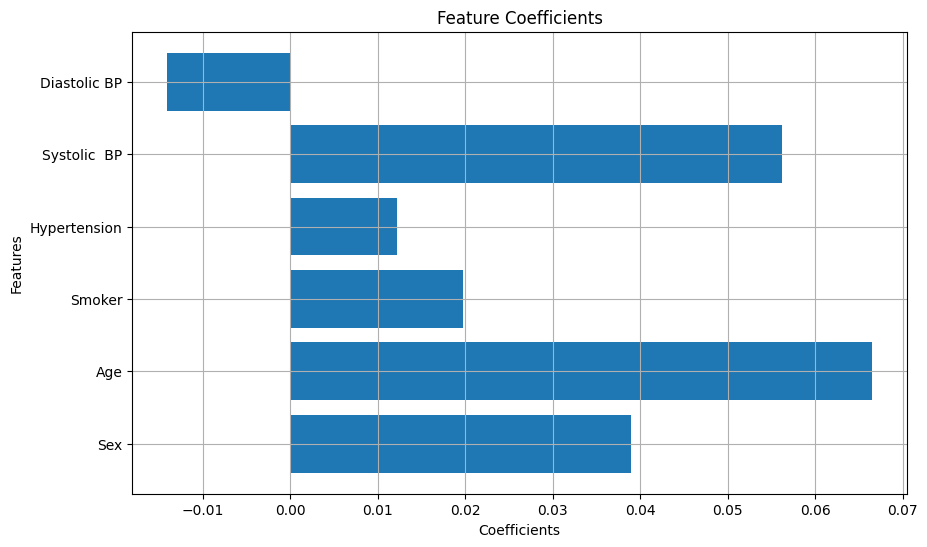

In [41]:
# plotting the coefficients
features = X.columns # Names of the features
coeffecients = model.coef_ # Coefficients of the model

plt.figure(figsize=(10, 6))
plt.barh(features, coeffecients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.grid(True)
plt.show()

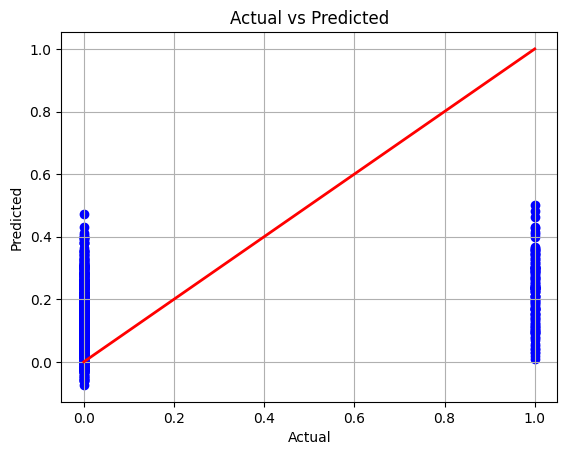

In [42]:
# plotting the actual vs predicted values
plt.Figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)  #line of perfect fit
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show() 

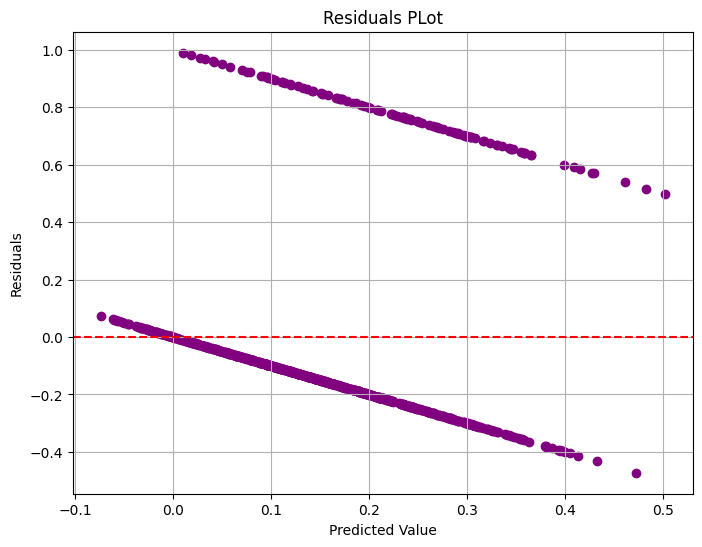

In [44]:
#calculating the residuals
residuals = Y_test - y_pred

# plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--') # Horizontal line at y=0
plt.title('Residuals PLot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [45]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [46]:
# X = df[['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']]
new_data = [[1, 45, 1, 1, 120, 80]]

#make peredictions
y_pred = model.predict(new_data)
y_pred

array([8.82836826])